In [ ]:
# Monta o Google Drive para acessar os dados.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando as bibliotecas necessárias para análise de dados.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Define o caminho para o arquivo CSV.
caminho = ("/content/drive/MyDrive/Ciência de Dados/Curso - Introdução a Machine Learning/Módulo 2 - Métodos de Aprendizado de Máquina e suas Aplicações/Regressão Linear/housing.csv")

# Carrega os dados do arquivo CSV em um DataFrame pandas.
df = pd.read_csv(caminho)

#Análise Exploratória de Dados

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Mostra a contagem de valores únicos na coluna 'total_bedrooms'.
df['total_bedrooms'].value_counts()

,count
total_bedrooms,
280.0,55
331.0,51
345.0,50
343.0,49
393.0,49
...,...
2961.0,1
1915.0,1
1215.0,1


In [ ]:
# Remove as linhas com valores nulos.
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9034
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,NaN
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,NaN
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,NaN


In [ ]:
# Mostra a contagem de valores únicos na coluna 'ocean_proximity'.
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


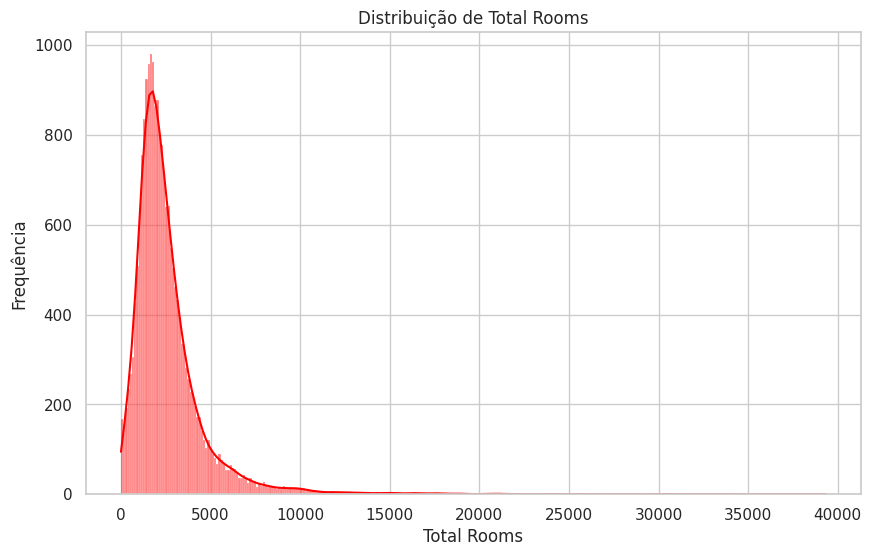

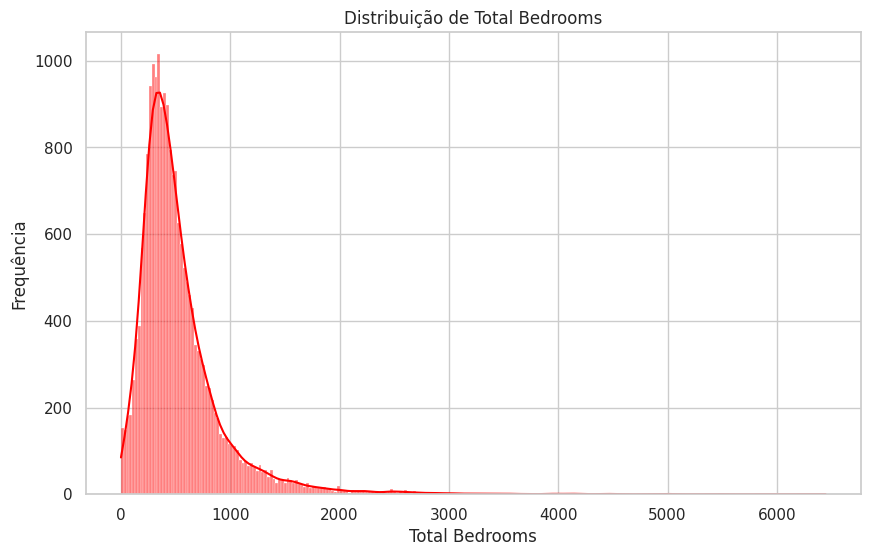

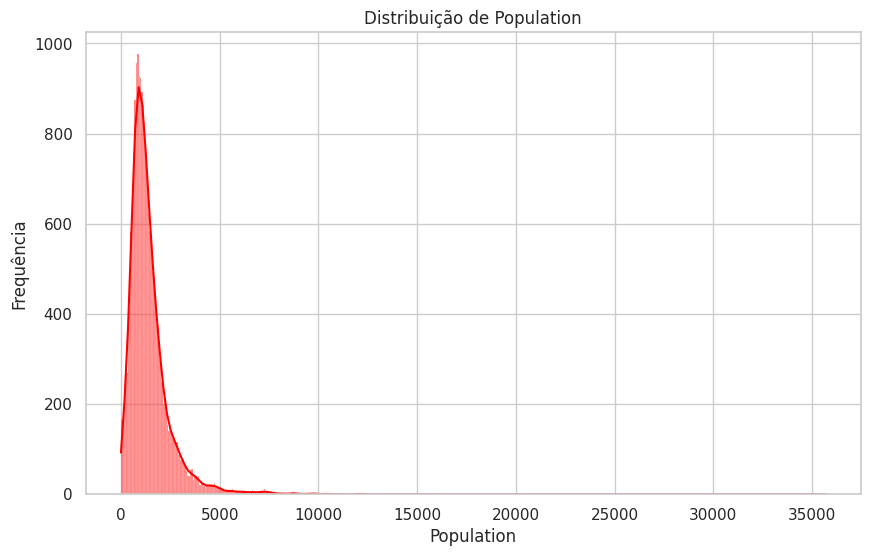

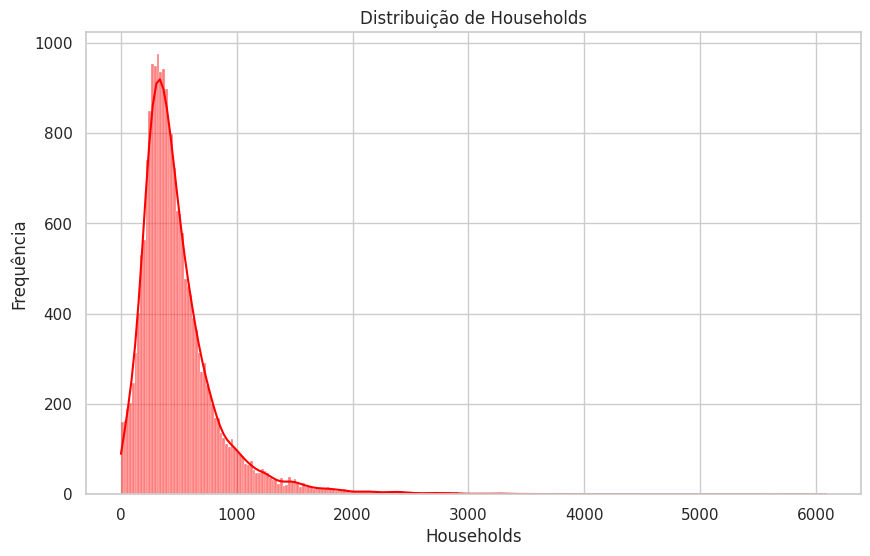

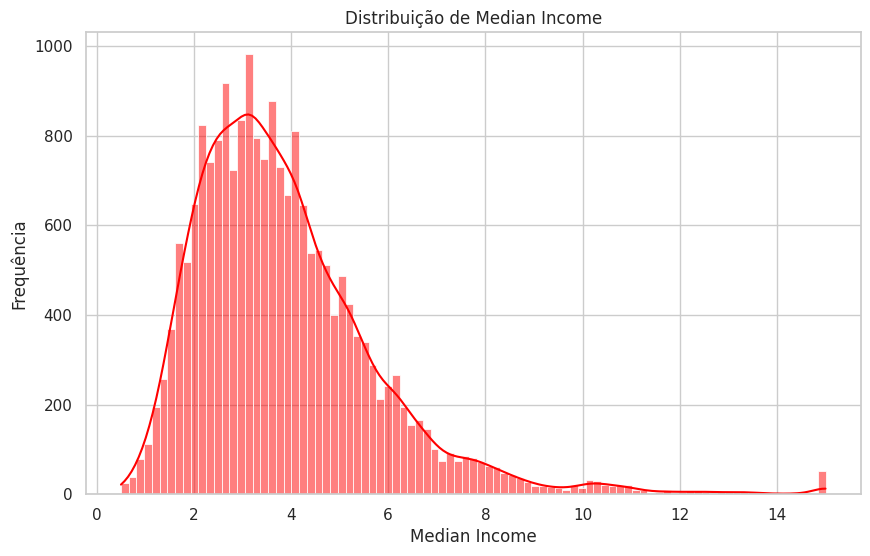

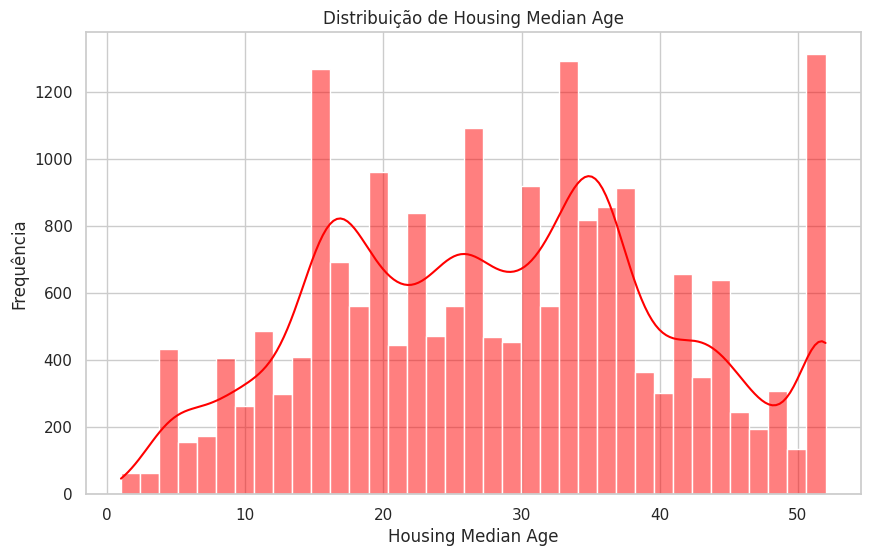

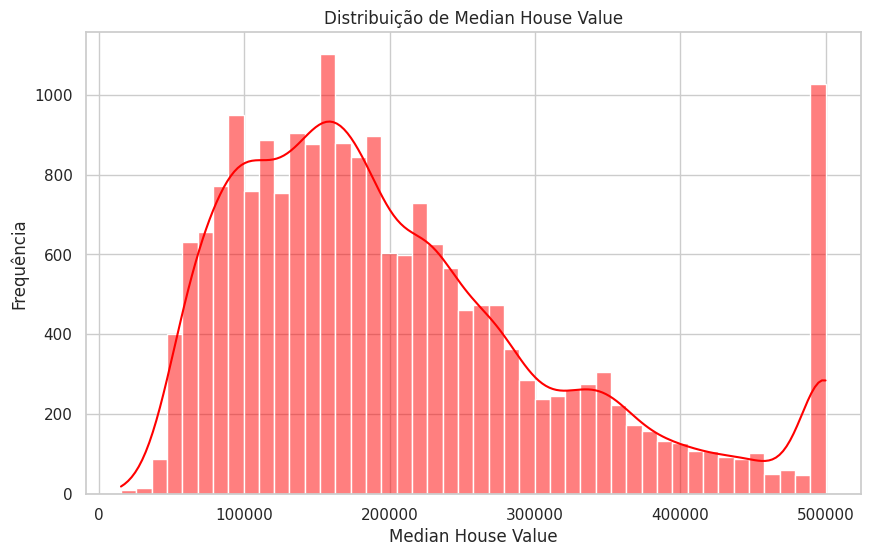

In [ ]:
# Lista das colunas para os histogramas
columns_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'housing_median_age', 'median_house_value']

# Configura o tema do Seaborn para todos os gráficos
sns.set_theme(style="whitegrid")

# Loop através das colunas
for column in columns_to_plot:
    # Cria uma nova figura para cada histograma
    plt.figure(figsize=(10, 6))

    # Cria o histograma usando sns.histplot
    sns.histplot(df[column], color='Red', kde=True)

    # Define o título e os rótulos dos eixos
    plt.title(f'Distribuição de {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Frequência')

    # Exibe o gráfico
    plt.show()

In [ ]:
# Função para remover outliers com base no IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
# Lista de colunas a serem processadas
colunas_para_limpar = ['total_rooms', 'total_bedrooms', 'population',
                    'households', 'median_income', 'housing_median_age',
                    'median_house_value']

In [ ]:
# Aplicando a função para cada coluna
for column in colunas_para_limpar:
    df = remove_outliers_iqr(df, column)
    print(f"Outliers removidos para a coluna: {column}")

Outliers removidos para a coluna: total_rooms
Outliers removidos para a coluna: total_bedrooms
Outliers removidos para a coluna: population
Outliers removidos para a coluna: households
Outliers removidos para a coluna: median_income
Outliers removidos para a coluna: housing_median_age
Outliers removidos para a coluna: median_house_value


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16724 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16724 non-null  float64
 1   latitude            16724 non-null  float64
 2   housing_median_age  16724 non-null  float64
 3   total_rooms         16724 non-null  float64
 4   total_bedrooms      16724 non-null  float64
 5   population          16724 non-null  float64
 6   households          16724 non-null  float64
 7   median_income       16724 non-null  float64
 8   median_house_value  16724 non-null  float64
 9   ocean_proximity     16724 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


#Pré-Processamento dos dados

In [ ]:
# Importa as bibliotecas para pré-processamento de dados.
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Cria um objeto OneHotEncoder.
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Aplica o OneHotEncoder na coluna 'ocean_proximity'.
encoder.fit(df[['ocean_proximity']])
ocean_proximity_encoded = encoder.transform(df[['ocean_proximity']])

In [ ]:
# Cria um DataFrame com as colunas codificadas.
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))

In [ ]:
# Remove a coluna original 'ocean_proximity'.
df.drop('ocean_proximity', axis=1, inplace=True)

# Concatena o DataFrame original com o DataFrame das colunas codificadas.
df = pd.concat([df, ocean_proximity_df], axis=1)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Cria novas colunas com base em relações entre as colunas existentes.
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_household,population_per_household
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,6.281853,1.081081,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,0.0,1.0,0.0,4.761658,1.103627,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,0.0,1.0,0.0,4.931907,0.951362,2.128405


In [ ]:
# Cria um objeto StandardScaler.
scaler = StandardScaler()

In [ ]:
# Aplica o StandardScaler nas colunas selecionadas.
scaled_data = scaler.fit_transform(df[['rooms_per_household', 'bedrooms_per_household', 'population_per_household']])

In [ ]:
# Adiciona as colunas escalonadas ao DataFrame.
df[['scaled_rooms_per_household', 'scaled_bedrooms_per_household', 'scaled_population_per_household']] = scaled_data

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_household,population_per_household,scaled_rooms_per_household,scaled_bedrooms_per_household,scaled_population_per_household
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,8.288136,1.073446,2.802260,1.300298,-0.044203,-0.152860
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,5.817352,1.073059,2.547945,0.212870,-0.045041,-0.400368
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,6.281853,1.081081,2.181467,0.417304,-0.027663,-0.757037
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,0.0,1.0,0.0,4.761658,1.103627,2.139896,-0.251756,0.021179,-0.797495
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,0.0,1.0,0.0,4.931907,0.951362,2.128405,-0.176827,-0.308679,-0.808679


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'rooms_per_household', 'bedrooms_per_household',
       'population_per_household', 'scaled_rooms_per_household',
       'scaled_bedrooms_per_household', 'scaled_population_per_household'],
      dtype='object')

In [ ]:
# Cria um novo DataFrame com as colunas selecionadas.
df_novo = df[[ 'median_house_value', 'median_income', 'total_rooms', 'total_bedrooms', 'housing_median_age',
    'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN', 'households', 'population', 'scaled_rooms_per_household',
    'scaled_bedrooms_per_household', 'scaled_population_per_household', 'latitude', 'longitude']]

In [ ]:
df_novo.head()

,median_house_value,median_income,total_rooms,total_bedrooms,housing_median_age,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,households,population,scaled_rooms_per_household,scaled_bedrooms_per_household,scaled_population_per_household,latitude,longitude
2,352100.0,7.2574,1467.0,190.0,52.0,0.0,0.0,0.0,1.0,0.0,177.0,496.0,1.300298,-0.044203,-0.152860,37.85,-122.24
3,341300.0,5.6431,1274.0,235.0,52.0,0.0,0.0,0.0,1.0,0.0,219.0,558.0,0.212870,-0.045041,-0.400368,37.85,-122.25
4,342200.0,3.8462,1627.0,280.0,52.0,0.0,0.0,0.0,1.0,0.0,259.0,565.0,0.417304,-0.027663,-0.757037,37.85,-122.25
5,269700.0,4.0368,919.0,213.0,52.0,0.0,0.0,0.0,1.0,0.0,193.0,413.0,-0.251756,0.021179,-0.797495,37.85,-122.25
6,299200.0,3.6591,2535.0,489.0,52.0,0.0,0.0,0.0,1.0,0.0,514.0,1094.0,-0.176827,-0.308679,-0.808679,37.84,-122.25


In [ ]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19899 entries, 2 to 16720
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   median_house_value               16724 non-null  float64
 1   median_income                    16724 non-null  float64
 2   total_rooms                      16724 non-null  float64
 3   total_bedrooms                   16724 non-null  float64
 4   housing_median_age               16724 non-null  float64
 5   ocean_proximity_<1H OCEAN        16724 non-null  float64
 6   ocean_proximity_INLAND           16724 non-null  float64
 7   ocean_proximity_ISLAND           16724 non-null  float64
 8   ocean_proximity_NEAR BAY         16724 non-null  float64
 9   ocean_proximity_NEAR OCEAN       16724 non-null  float64
 10  households                       16724 non-null  float64
 11  population                       16724 non-null  float64
 12  scaled_rooms_per_househ

In [ ]:
df_novo.describe()

,median_house_value,median_income,total_rooms,total_bedrooms,housing_median_age,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,households,population,scaled_rooms_per_household,scaled_bedrooms_per_household,scaled_population_per_household,latitude,longitude
count,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,16724.000000,1.672400e+04,1.672400e+04,1.672400e+04,16724.000000,16724.000000
mean,185327.295862,3.577614,2071.602069,426.680878,29.657379,0.428546,0.338496,0.000299,0.107391,0.125269,399.249402,1148.708981,-3.738804e-17,1.189620e-16,-1.070658e-16,35.716089,-119.615090
std,92030.433835,1.446461,1023.792361,200.455468,12.218904,0.494883,0.473212,0.017289,0.309618,0.331034,185.928287,548.663279,1.000030e+00,1.000030e+00,1.000030e+00,2.173731,2.005492
min,14999.000000,0.499900,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,-1.975026e+00,-1.647536e+00,-2.206337e+00,32.540000,-124.350000
25%,112500.000000,2.482100,1348.000000,282.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,267.000000,753.000000,-3.919914e-01,-1.982328e-01,-4.891484e-01,33.940000,-121.782500
50%,169200.000000,3.395800,1932.000000,401.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,378.500000,1086.000000,-6.861568e-02,-1.021487e-01,-1.170419e-01,34.405000,-118.710000
75%,240300.000000,4.500000,2685.000000,555.000000,38.000000,1.000000,1.000000,0.000000,0.000000,0.000000,520.000000,1504.000000,2.635628e-01,1.168175e-02,3.335462e-01,37.750000,-118.030000
max,457800.000000,8.015800,5675.000000,1053.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,906.000000,2717.000000,5.598240e+01,7.143019e+01,5.916354e+01,41.950000,-114.490000


In [ ]:
# Exibe a contagem de valores nulos em cada coluna.
df_novo.isna().sum()

,0
median_house_value,3175
median_income,3175
total_rooms,3175
total_bedrooms,3175
housing_median_age,3175
ocean_proximity_<1H OCEAN,3175
ocean_proximity_INLAND,3175
ocean_proximity_ISLAND,3175
ocean_proximity_NEAR BAY,3175
ocean_proximity_NEAR OCEAN,3175


In [ ]:
# Remove as linhas com valores nulos.
df_novo.dropna(inplace=True)

<ipython-input-160-4e0f8504a4ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo.dropna(inplace=True)


In [ ]:
# Exibe informações sobre o DataFrame.
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13549 entries, 2 to 16723
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   median_house_value               13549 non-null  float64
 1   median_income                    13549 non-null  float64
 2   total_rooms                      13549 non-null  float64
 3   total_bedrooms                   13549 non-null  float64
 4   housing_median_age               13549 non-null  float64
 5   ocean_proximity_<1H OCEAN        13549 non-null  float64
 6   ocean_proximity_INLAND           13549 non-null  float64
 7   ocean_proximity_ISLAND           13549 non-null  float64
 8   ocean_proximity_NEAR BAY         13549 non-null  float64
 9   ocean_proximity_NEAR OCEAN       13549 non-null  float64
 10  households                       13549 non-null  float64
 11  population                       13549 non-null  float64
 12  scaled_rooms_per_househ

In [ ]:
# Calcula a matriz de correlação.
corr = df_novo.corr()

Text(0.5, 1.0, 'Matriz de Correlação')

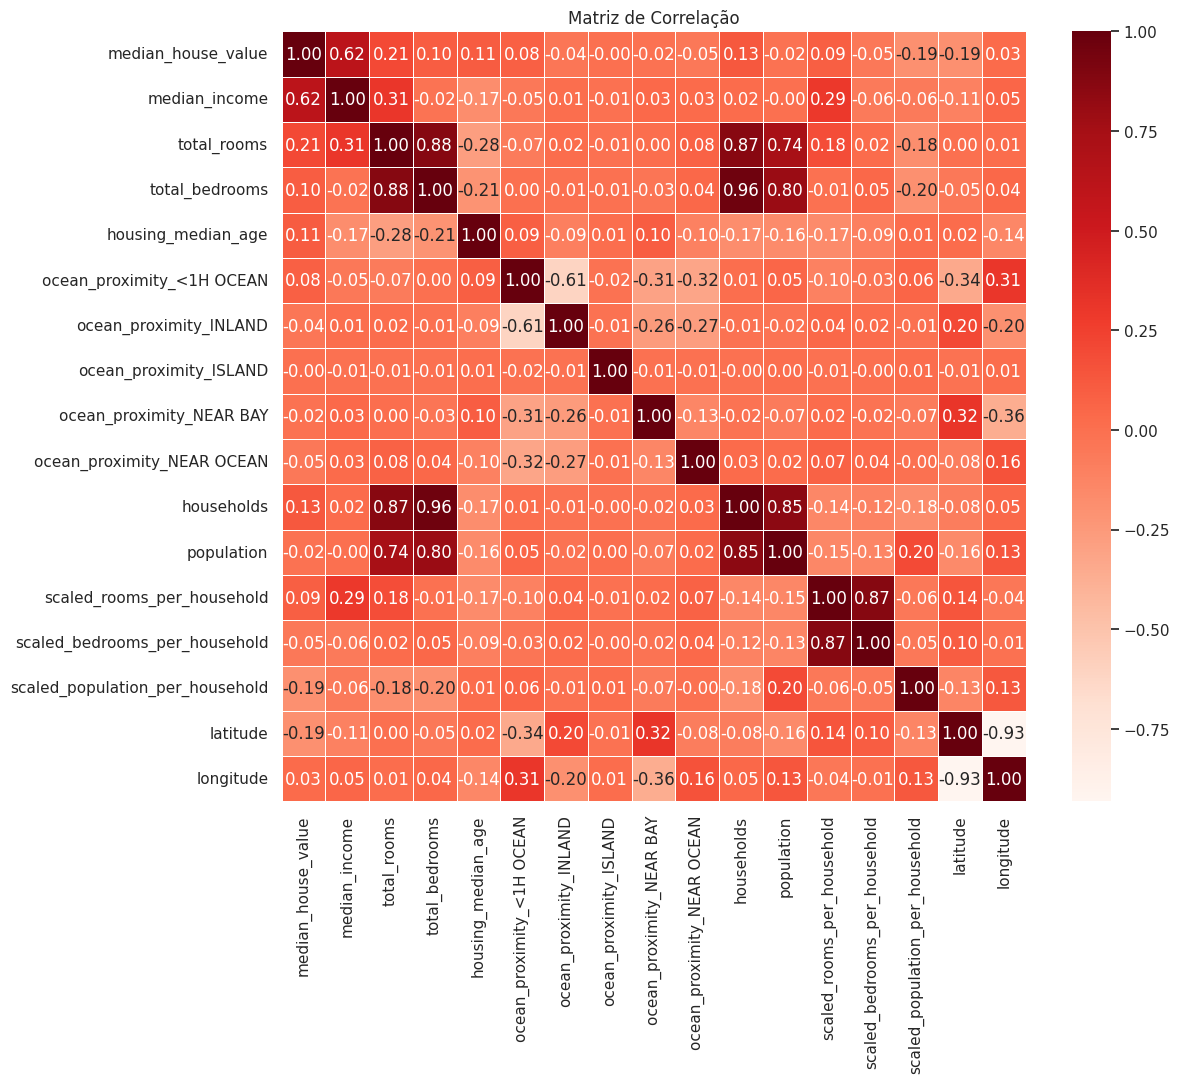

In [ ]:
# Cria um gráfico de calor atravésda matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')

#Processamento dos dados

In [ ]:
# Importa as funções para dividir os dados e fazer validação cruzada.
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Define as variáveis independentes.
X = df_novo.drop('median_house_value', axis=1)

# Define a variável dependente.
y = df_novo['median_house_value']

In [ ]:
# Divide os dados em conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Exibe o formato dos conjuntos de treino e teste.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9077, 16), (4472, 16), (9077,), (4472,))

In [ ]:
# Importa a classe para regressão linear.
from sklearn.linear_model import LinearRegression

In [ ]:
# Cria o modelo de regressão linear.
model = LinearRegression()

In [ ]:
# Ajusta o modelo aos dados de treino.
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Faz as previsões com os dados de teste.
y_pred = model.predict(X_test)

In [ ]:
# Importa as métricas para avaliação do modelo.
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred) # Calcula o erro quadrático médio.
r2 = r2_score(y_test, y_pred) # Calcula o R².

In [ ]:
print("Mean Squared Error:", mse) # Imprime o erro quadrático médio.
print("R-squared:", r2) # Imprime o R².

Mean Squared Error: 3248725642.889499
R-squared: 0.5897655147848613


In [ ]:
rmse = np.sqrt(mse) # Calcula a raiz do erro quadrático médio.
print("Root Mean Squared Error:", rmse) # Imprime a raiz do erro quadrático médio.

Root Mean Squared Error: 56997.593307871335


In [ ]:
# Faz a validação cruzada e alcula a raiz do erro quadrático médio
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-scores) ** 0.5
print(rmse_scores.mean())

60450.4270879759


#Ajuste de hiperparâmetros

In [ ]:
# Importa a classe ElasticNet.
from sklearn.linear_model import ElasticNet

In [ ]:
# Importa a classe GridSearchCV.
from sklearn.model_selection import GridSearchCV

In [ ]:
# Criando o modelo ElasticNet
elastic_net = ElasticNet()

In [ ]:
# Definindo a grade de valores para 'alpha' e 'l1_ratio'
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 1.0]  # Proporção L1/L2
}

In [ ]:
# Configurando o GridSearchCV
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Ajustando o modelo aos dados
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.020e+11, tolerance: 5.770e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+11, tolerance: 5.761e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.999e+11, tolerance: 5.816e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
# Melhor modelo do GridSearch
best_model = grid_search.best_estimator_

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = best_model.predict(X_test)

In [ ]:
# Calculando MSE, RMSE e R²
mse = mean_squared_error(y_test, y_pred)  # MSE
rmse = np.sqrt(mse)                      # RMSE
r2 = r2_score(y_test, y_pred)            # R²

In [ ]:
# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor MSE (negativo no GridSearch):", grid_search.best_score_)
print("MSE no conjunto de teste:", mse)
print("RMSE no conjunto de teste:", rmse)
print("R² no conjunto de teste:", r2)

Melhores parâmetros: {'alpha': 0.1, 'l1_ratio': 0.7}
Melhor MSE (negativo no GridSearch): -3230979912.6603136
MSE no conjunto de teste: 3241931430.613128
RMSE no conjunto de teste: 56937.96124391115
R² no conjunto de teste: 0.5906234574005265
